In [ ]:
!pip install seaborn

In [6]:
import kagglehub
import pandas as pd
import os

# Kaggle 데이터셋 다운로드
dataset_dir = kagglehub.dataset_download("saurav9786/amazon-product-reviews")

# 디렉터리 내 파일 확인
print("Downloaded files:", os.listdir(dataset_dir))

# 다운로드된 파일 이름을 명확히 지정
csv_file_path = os.path.join(dataset_dir, "ratings_Electronics (1).csv")
# CSV 파일 읽기
df = pd.read_csv(csv_file_path, header=None, names=['UserID', 'ProductID', 'Rating', 'Timestamp'])

# Timestamp 컬럼을 datetime 형식으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# 데이터프레임 확인
print(df.head())


Downloaded files: ['ratings_Electronics (1).csv']
           UserID   ProductID  Rating  Timestamp
0   AKM1MP6P0OYPR  0132793040     5.0 2013-04-13
1  A2CX7LUOHB2NDG  0321732944     5.0 2012-07-01
2  A2NWSAGRHCP8N5  0439886341     1.0 2013-04-29
3  A2WNBOD3WNDNKT  0439886341     3.0 2013-07-22
4  A1GI0U4ZRJA8WN  0439886341     1.0 2012-04-18


In [ ]:
# corr()를 사용하여 상관계수 계산
correlation = df[['Rating', 'Timestamp']].corr()
print("\nRating과 Timestamp 간의 상관계수:")
print(correlation)

In [ ]:
# head()와 tail()을 사용하여 데이터 요약 출력
print("\n데이터의 처음 5개 행:")
print(df.head())
print("\n데이터의 마지막 5개 행:")
print(df.tail())

In [ ]:
# set_index()와 sort_index()를 사용하여 데이터 정렬
sorted_df = df.set_index('ProductID').sort_index()
print("ProductID를 기준으로 정렬된 데이터:")
print(sorted_df.head())

In [ ]:
# 1. ProductID 별 평균 평점, 리뷰 수, 표준편차 계산
product_stats = df.groupby('ProductID').agg(
    avg_rating=('Rating', 'mean'),
    review_count=('Rating', 'count'),
    rating_std=('Rating', 'std')
).reset_index()

print("제품별 통계 정보:")
print(product_stats.head())

제품별 통계 정보:
    ProductID  avg_rating  review_count  rating_std
0  0132793040    5.000000             1         NaN
1  0321732944    5.000000             1         NaN
2  0439886341    1.666667             3    1.154701
3  0511189877    4.500000             6    1.224745
4  0528881469    2.851852            27    1.680286


In [ ]:
# 2. UserID 별 총 리뷰 수, 가장 높은 평점, 가장 낮은 평점 계산
user_stats = df.groupby('UserID').agg(
    total_reviews=('Rating', 'count'),
    max_rating=('Rating', 'max'),
    min_rating=('Rating', 'min')
).reset_index()

print("사용자별 통계 정보:")
print(user_stats.head())

사용자별 통계 정보:
                  UserID  total_reviews  max_rating  min_rating
0  A00038802J7X43YTW44TD              2         5.0         1.0
1  A000428226SAAAIBK8I36              1         5.0         5.0
2   A0004478EF5NFPHLGCWG              1         4.0         4.0
3   A000681618A3WRMCK53V              1         2.0         2.0
4   A00101847G3FJTWYGNQA              1         5.0         5.0


In [ ]:
# 3. 월별 평균 평점 및 리뷰 수 계산
df['Month'] = df['Timestamp'].dt.to_period('M')
monthly_stats = df.groupby('Month').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Rating', 'count')
).reset_index()

print("월별 통계 정보:")
print(monthly_stats.head())

월별 통계 정보:
     Month  avg_rating  total_reviews
0  1998-12    4.500000              4
1  1999-05    5.000000              2
2  1999-06    4.000000             17
3  1999-07    4.072464             69
4  1999-08    4.414634             41


In [ ]:
# 4. ProductID 별로 가장 높은 평점을 받은 사용자(UserID) 찾기
top_rated_users = df.loc[df.groupby('ProductID')['Rating'].idxmax()][['ProductID', 'UserID', 'Rating']]
print("제품별 최고 평점을 준 사용자 정보:")
print(top_rated_users.head())

제품별 최고 평점을 준 사용자 정보:
     ProductID          UserID  Rating
0   0132793040   AKM1MP6P0OYPR     5.0
1   0321732944  A2CX7LUOHB2NDG     5.0
3   0439886341  A2WNBOD3WNDNKT     3.0
5   0511189877  A1QGNMC6O1VW39     5.0
11  0528881469  A1DA3W4GTFXP6O     5.0


In [ ]:
avg_rating_per_product = df.groupby('ProductID')['Rating'].mean()
print(avg_rating_per_product.head())

ProductID
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: Rating, dtype: float64


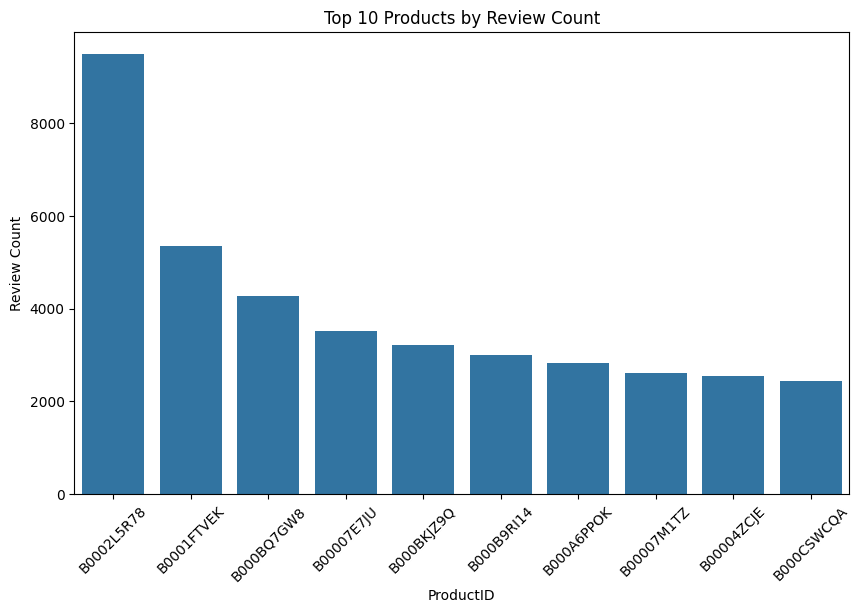

In [ ]:
# 시각화: 제품별 리뷰 수 상위 10개
top_products = product_stats.nlargest(10, 'review_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductID', y='review_count', data=top_products)
plt.title('Top 10 Products by Review Count')
plt.xlabel('ProductID')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

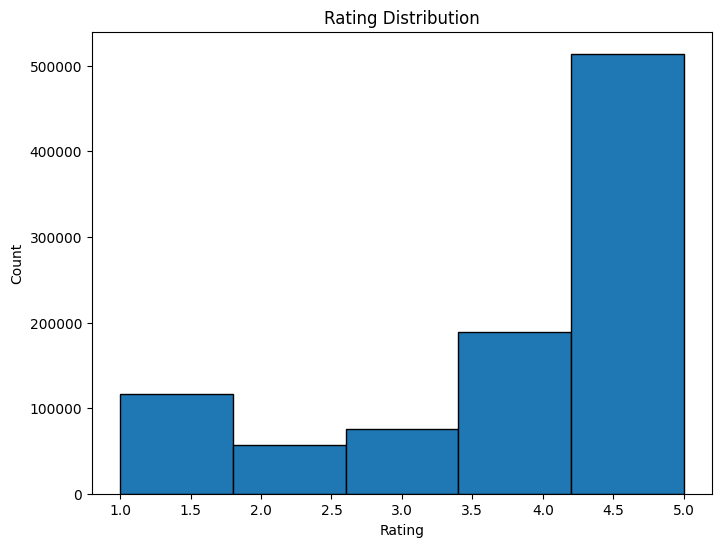

In [ ]:
import matplotlib.pyplot as plt

# 평점 분포 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=5, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

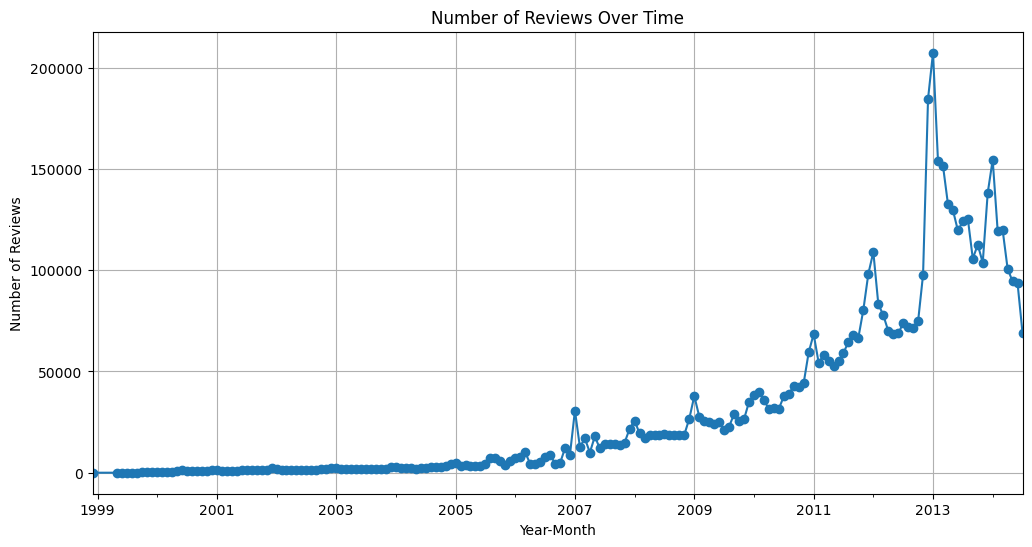

In [ ]:
# 시간 단위로 리뷰 수 계산
df['YearMonth'] = df['Timestamp'].dt.to_period('M')  # 연-월 단위로 변환
review_counts_by_month = df.groupby('YearMonth').size()

# 시각화
plt.figure(figsize=(12, 6))
review_counts_by_month.plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

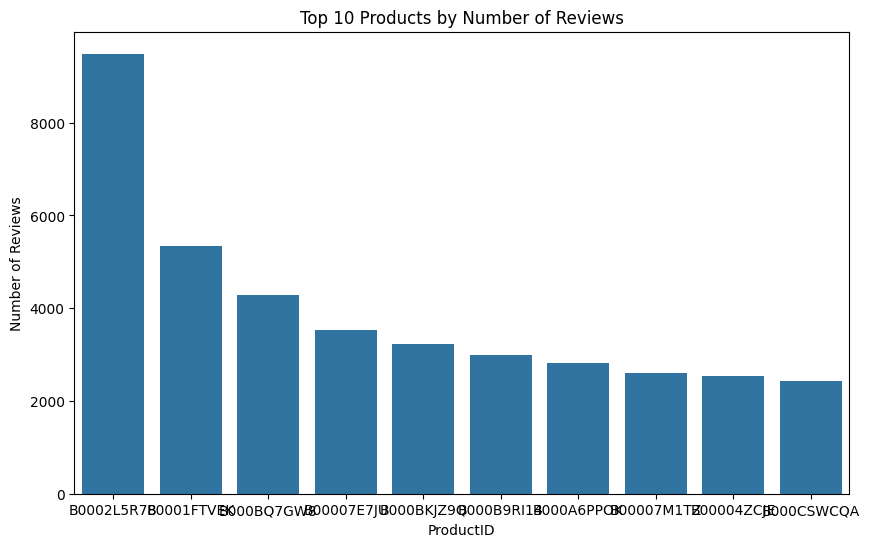

In [ ]:
#데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# 제품별 리뷰 개수
product_review_counts = df['ProductID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_review_counts.index, y=product_review_counts.values)
plt.title('Top 10 Products by Number of Reviews')
plt.xlabel('ProductID')
plt.ylabel('Number of Reviews')
plt.show()

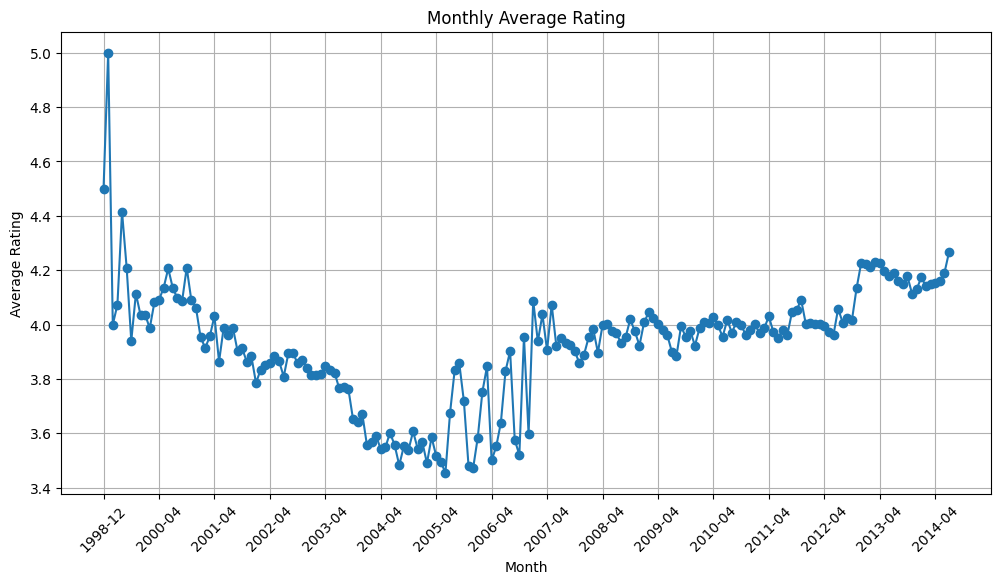

In [ ]:
# 월별 평균 평점 계산
monthly_avg_rating = df.groupby(df['Timestamp'].dt.to_period('M'))['Rating'].mean().reset_index()
monthly_avg_rating.columns = ['Month', 'Average Rating']

# 월별 평균 평점 라인 차트
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rating['Month'].astype(str), monthly_avg_rating['Average Rating'], marker='o')
plt.title('Monthly Average Rating')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# X축 간격 설정: 12개월마다 라벨 표시
plt.xticks(ticks=range(0, len(monthly_avg_rating), 12), labels=monthly_avg_rating['Month'].astype(str)[::12], rotation=45)

plt.grid(True)
plt.show()

In [ ]:
# 결측치 확인 및 제거
print(df.isnull().sum())  # 각 컬럼의 결측치 개수 출력
df = df.dropna()  # 결측치 제거

# 유저별 리뷰 개수를 새로운 feature로 추가
df['UserReviewCount'] = df.groupby('UserID')['UserID'].transform('count')

# Feature와 Target 설정
X = df[['UserReviewCount']]
y = df['Rating']

# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


UserID             0
ProductID          0
Rating             1
Timestamp          1
UserReviewCount    0
dtype: int64
Mean Squared Error: 1.960396720250489
